In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from load_data import load_K1, load_SE_A, load_parameters
from plotting_routines import generate_filename_fRG, change_prefix, plot_fRG
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.rc('text', usetex=True)
plt.rc('font', family='serif')


path = "../Data/"
PC = "parquet_check_"
EA = "error_analysis_"

In [2]:
def retrieve_Gammas(filenames):
    Gamma_list = []
    for filename in filenames:
        _, _, _, _, _, Gamma, _, _, _ = load_parameters(filename)
        
        Gamma_list.append(Gamma)
        
    return Gamma_list

In [9]:
def load_error_analysis_data_for_file(filename_EA):
    with h5py.File(filename_EA, 'r') as f:
        lambdas = np.array(f['lambdas'])
        norms_K1_fRG = np.array(f['norm_K1_fRG'])
        norms_K1_PC  = np.array(f['norm_K1_BSE'])
        K1_diff_abs = np.array(f['K1_diff_abs'])
        K1_diff_rel = np.array(f['K1_diff_rel'])
    
        norms_K2_fRG = np.array(f['norm_K2_fRG'])
        norms_K2_PC  = np.array(f['norm_K2_BSE'])
        K2_diff_abs = np.array(f['K2_diff_abs'])
        K2_diff_rel = np.array(f['K2_diff_rel'])
                            
        norms_S_fRG = np.array(f['norm_S_fRG'])
        norms_S_PC  = np.array(f['norm_S_SDE'])
        Sigma_diff_abs = np.array(f['Sigma_diff_abs'])
        Sigma_diff_rel = np.array(f['Sigma_diff_rel'])
    
    return lambdas, norms_K1_fRG, norms_K1_PC, K1_diff_abs, K1_diff_rel, \
            norms_K2_fRG, norms_K2_PC, K2_diff_abs, K2_diff_rel, \
            norms_S_fRG, norms_S_PC, Sigma_diff_abs, Sigma_diff_rel

In [10]:
def load_error_analysis_data_complete(filenames):
    lambdas_list= []
    norms_K1_fRG_list, norms_K1_PC_list = [], []
    K1_diff_abs_list, K1_diff_rel_list = [], []
    norms_K2_fRG_list, norms_K2_PC_list = [], []
    K2_diff_abs_list, K2_diff_rel_list = [], []
    norms_S_fRG_list, norms_S_PC_list = [], []
    Sigma_diff_abs_list, Sigma_diff_rel_list = [], []
    
    for filename in filenames:
        lambdas, norms_K1_fRG, norms_K1_PC, K1_diff_abs, K1_diff_rel, \
        norms_K2_fRG, norms_K2_PC, K2_diff_abs, K2_diff_rel, \
        norms_S_fRG, norms_S_PC, Sigma_diff_abs, Sigma_diff_rel = load_error_analysis_data_for_file(filename)
        
        
        lambdas_list.append(lambdas)        
        norms_K1_fRG_list.append(norms_K1_fRG)
        norms_K1_PC_list.append(norms_K1_PC)
        K1_diff_abs_list.append(K1_diff_abs)
        K1_diff_rel_list.append(K1_diff_rel)
        norms_K2_fRG_list.append(norms_K2_fRG)
        norms_K2_PC_list.append(norms_K2_PC)
        K2_diff_abs_list.append(K2_diff_abs)
        K2_diff_rel_list.append(K2_diff_rel)
        norms_S_fRG_list.append(norms_S_fRG)
        norms_S_PC_list.append(norms_S_PC)
        Sigma_diff_abs_list.append(Sigma_diff_abs)
        Sigma_diff_rel_list.append(Sigma_diff_rel)
    
    return lambdas_list, norms_K1_fRG_list, norms_K1_PC_list, K1_diff_abs_list, K1_diff_rel_list, \
            norms_K2_fRG_list, norms_K2_PC_list, K2_diff_abs_list, K2_diff_rel_list, \
            norms_S_fRG_list, norms_S_PC_list, Sigma_diff_abs_list, Sigma_diff_rel_list

In [11]:
name1 = generate_filename_fRG(path, 1, 1)
name2 = generate_filename_fRG(path, 1, 1, sf=True)
name3 = generate_filename_fRG(path, 2, 1)

Gammas_list = retrieve_Gammas([name1, name2, name3])

name1 = change_prefix(path, EA, name1)
name2 = change_prefix(path, EA, name2)
name3 = change_prefix(path, EA, name3)

In [12]:
filenames_ea = [name1, name2, name3]
labels_ea = [r'$\mathcal{K}_1$', r'$\mathcal{K}_1\mathrm{-sf}$', r'$\mathcal{K}_2\mathrm{-1L} $']

In [13]:
lambdas_list, norms_K1_fRG_list, norms_K1_PC_list, K1_diff_abs_list, K1_diff_rel_list, \
norms_K2_fRG_list, norms_K2_PC_list, K2_diff_abs_list, K2_diff_rel_list, \
norms_S_fRG_list, norms_S_PC_list, Sigma_diff_abs_list, Sigma_diff_rel_list = load_error_analysis_data_complete(filenames_ea)

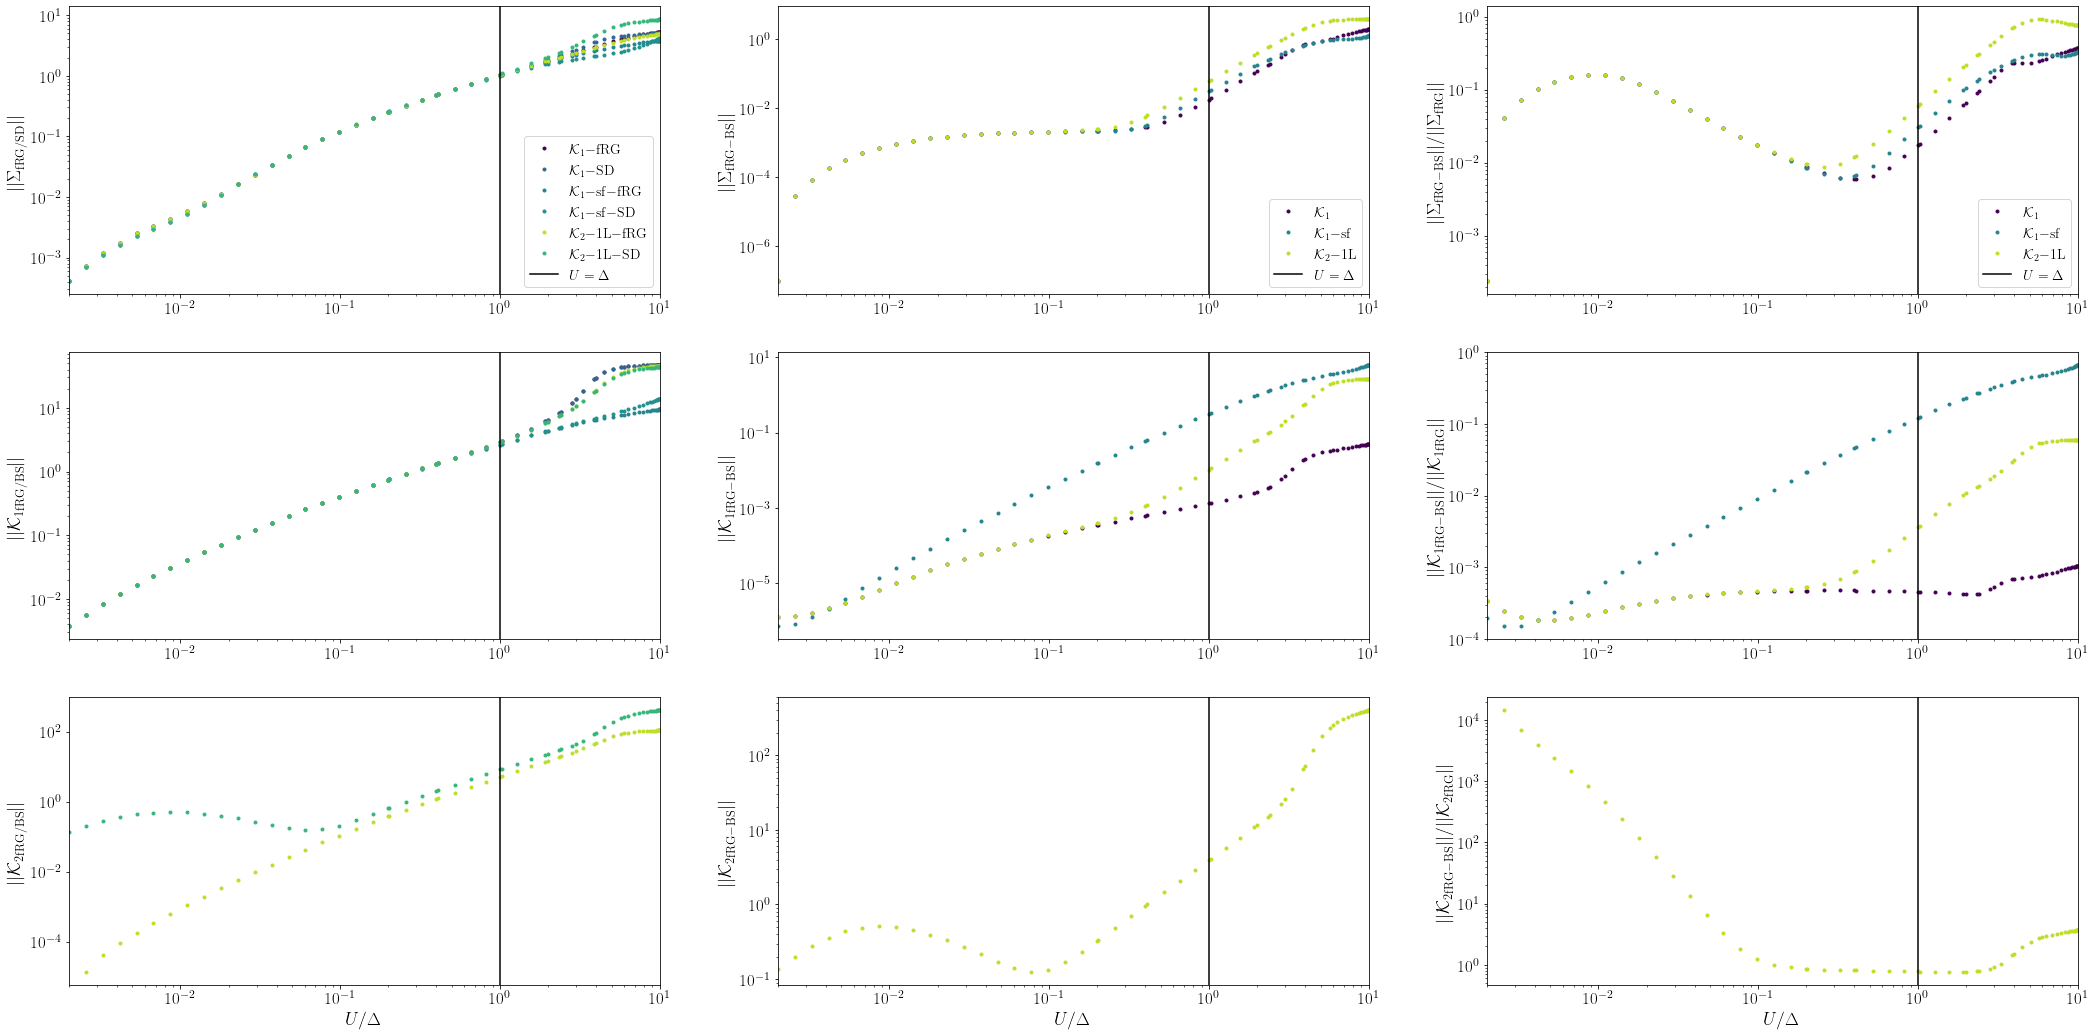

In [14]:
fs = 18
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(36,18))

U=1

c=cm.viridis(np.linspace(0,0.9, len(filenames_ea)))
c_PC=cm.viridis(np.linspace(1./3., 2./3., len(filenames_ea)))


for i in range(len(filenames_ea)):
    Deltas = (lambdas_list[i] + Gammas_list[i])/2
    
    ax[0][0].plot(U/Deltas, norms_S_fRG_list[i], '.', label=labels_ea[i] + r'$\mathrm{-fRG}$', color=c[i])
    ax[0][0].plot(U/Deltas, norms_S_PC_list[i] , '.', label=labels_ea[i] + r'$\mathrm{-SD}$', color=c_PC[i])
    ax[0][1].plot(U/Deltas, Sigma_diff_abs_list[i], '.', label=labels_ea[i], color=c[i])
    ax[0][2].plot(U/Deltas, Sigma_diff_rel_list[i], '.', label=labels_ea[i], color=c[i])

    ax[1][0].plot(U/Deltas, norms_K1_fRG_list[i], '.', label=labels_ea[i] + r'$\mathrm{-fRG}$', color=c[i])
    ax[1][0].plot(U/Deltas, norms_K1_PC_list[i] , '.', label=labels_ea[i] + r'$\mathrm{-BS}$', color=c_PC[i])
    ax[1][1].plot(U/Deltas, K1_diff_abs_list[i] , '.', label=labels_ea[i], color=c[i])
    ax[1][2].plot(U/Deltas, K1_diff_rel_list[i] , '.', label=labels_ea[i], color=c[i])
    
    ax[0][0].set_ylabel(r'$||\Sigma_{\mathrm{fRG/SD}}||$',fontsize=fs)
    ax[0][1].set_ylabel(r'$||\Sigma_{\mathrm{fRG}-\mathrm{BS}}||$',fontsize=fs)
    ax[0][2].set_ylabel(r'$||\Sigma_{\mathrm{fRG}-\mathrm{BS}}||/||\Sigma_{\mathrm{fRG}}||$',fontsize=fs)

    ax[1][0].set_ylabel(r'$||{\mathcal{K}_1}_{\mathrm{fRG/BS}}||$',fontsize=fs)
    ax[1][1].set_ylabel(r'$||{\mathcal{K}_1}_{\mathrm{fRG}-\mathrm{BS}}||$',fontsize=fs)
    ax[1][2].set_ylabel(r'$||{\mathcal{K}_1}_{\mathrm{fRG}-\mathrm{BS}}||/||{\mathcal{K}_1}_{\mathrm{fRG}}||$',fontsize=fs)
    
    if(filenames_ea[i][len(path+EA)+1] == str(2)):
        ax[2][0].plot(U/Deltas, norms_K2_fRG_list[i], '.', label=labels_ea[i] + r'$\mathrm{-fRG}$', color=c[i])
        ax[2][0].plot(U/Deltas, norms_K2_PC_list[i] , '.', label=labels_ea[i] + r'$\mathrm{-BS}$', color=c_PC[i])
        ax[2][1].plot(U/Deltas, K2_diff_abs_list[i] , '.', label=labels_ea[i], color=c[i])
        ax[2][2].plot(U/Deltas, K2_diff_rel_list[i] , '.', label=labels_ea[i], color=c[i])

        ax[2][0].set_ylabel(r'$||{\mathcal{K}_2}_{\mathrm{fRG/BS}}||$',fontsize=fs)
        ax[2][1].set_ylabel(r'$||{\mathcal{K}_2}_{\mathrm{fRG}-\mathrm{BS}}||$',fontsize=fs)
        ax[2][2].set_ylabel(r'$||{\mathcal{K}_2}_{\mathrm{fRG}-\mathrm{BS}}||/||{\mathcal{K}_2}_{\mathrm{fRG}}||$',fontsize=fs)


#ax[0][0].set_ylim(1.8,2.4)
#ax[1][0].set_ylim(0.4,0.6)

for i in range(3):
    for j in range(3):
        ax[i][j].axvline(1, color='k', label=r'$U=\Delta$')
        ax[i][j].set_xlim(U/Deltas[0], U/Deltas[-1])
        ax[i][j].set_xscale("log")
        ax[2][j].set_xlabel(r'$U/\Delta$', fontsize = fs)
        ax[i][j].set_yscale("log")
        ax[0][j].legend(loc='lower right', fontsize=fs-4)
        ax[i][j].tick_params(axis='both', labelsize=fs-1)

#ax[1][2].legend(loc='upper right', fontsize=fs-4)

plt.savefig("Error_analysis_with_K2.pdf")

In [ ]:
filename = generate_filename_fRG(path, 2, 1)
filename_PC = change_prefix(path, PC, filename)
filename_EA = change_prefix(path, EA, filename)

In [ ]:
w_fRG, K1a_fRG, K1p_fRG, K1t_fRG = load_K1(filename)
w_PC , K1a_PC , K1p_PC , K1t_PC  = load_K1(filename_PC)

v_fRG, SE_fRG, A_fRG = load_SE_A(filename)
v_PC , SE_PC , A_PC  = load_SE_A(filename_PC)

In [ ]:
fs = 18
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(24,12))


# real part of spin susceptibility (retarded comp. of K1a)
ax[0][0].plot(w_fRG, K1a_fRG[0].real, label='fRG')
ax[0][0].plot(w_PC , K1a_PC[0].real, label='BSE')

# imag part of spin susceptibility (retarded comp. of K1a = -advanced comp. of K1a)
ax[0][1].plot(w_fRG, -K1a_fRG[0].imag, label='fRG')
ax[0][1].plot(w_PC, -K1a_PC[0].imag, label='BSE')

#real part of the self energy
ax[1][0].plot(v_fRG, SE_fRG[0].real, label='fRG')
ax[1][0].plot(v_PC , SE_PC[0].real, label='BSE')
#imag part of the self energy
ax[1][1].plot(v_fRG, SE_fRG[0].imag, label='fRG')
ax[1][1].plot(v_PC , SE_PC[0].imag, label='BSE')

ax[0][0].set_ylabel(r'$\mathrm{Re}(\chi_\mathrm{sp}(\omega))$', fontsize=fs)
ax[0][1].set_ylabel(r'$\mathrm{Im}(\chi_\mathrm{sp}(\omega))$', fontsize=fs)
ax[1][0].set_ylabel(r'$\mathrm{Re}(\Sigma^R(\nu))$', fontsize=fs)
ax[1][1].set_ylabel(r'$\mathrm{Im}(\Sigma^R(\nu))$', fontsize=fs)

for i in range(2):
    ax[0][i].set_xlim(w_fRG[0], w_fRG[-1])
    ax[0][i].set_xlabel(r'$\omega/\Gamma$', fontsize=fs)
    
    ax[1][i].set_xlim(v_fRG[0], v_fRG[-1])
    ax[1][i].set_xlabel(r'$\nu/\Gamma$', fontsize=fs)
    
    ax[0][i].tick_params(axis='both', labelsize=fs-1)
    ax[1][i].tick_params(axis='both', labelsize=fs-1)

    ax[i][0].legend(fontsize=fs)
    

fig.tight_layout(pad=3.0)

plt.savefig("spin_susc@Lambda="+str(lambdas[0])+".pdf")
